# Compte rendu traitement de données informatique

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

*explication de ce qu'on va faire*

In [2]:
df = pd.read_csv('Figure_4b.csv')
df2 = pd.read_csv('Figure_4.csv')
fusion_df = pd.merge(df, df2, left_on='Commune_Name', right_on='Libelle_commune_2022', how='inner')
fusion_df.to_csv('fichier_fusionne.csv', index=False)

Nous avons trouvé des données sur le site de l'Insee *source*
Afin de croiser les deux tableaux de données, nous les avons d'abord fusionnés en un seul dataframe.

## Evolution de la distance domicile travail entre 1999 et 2019

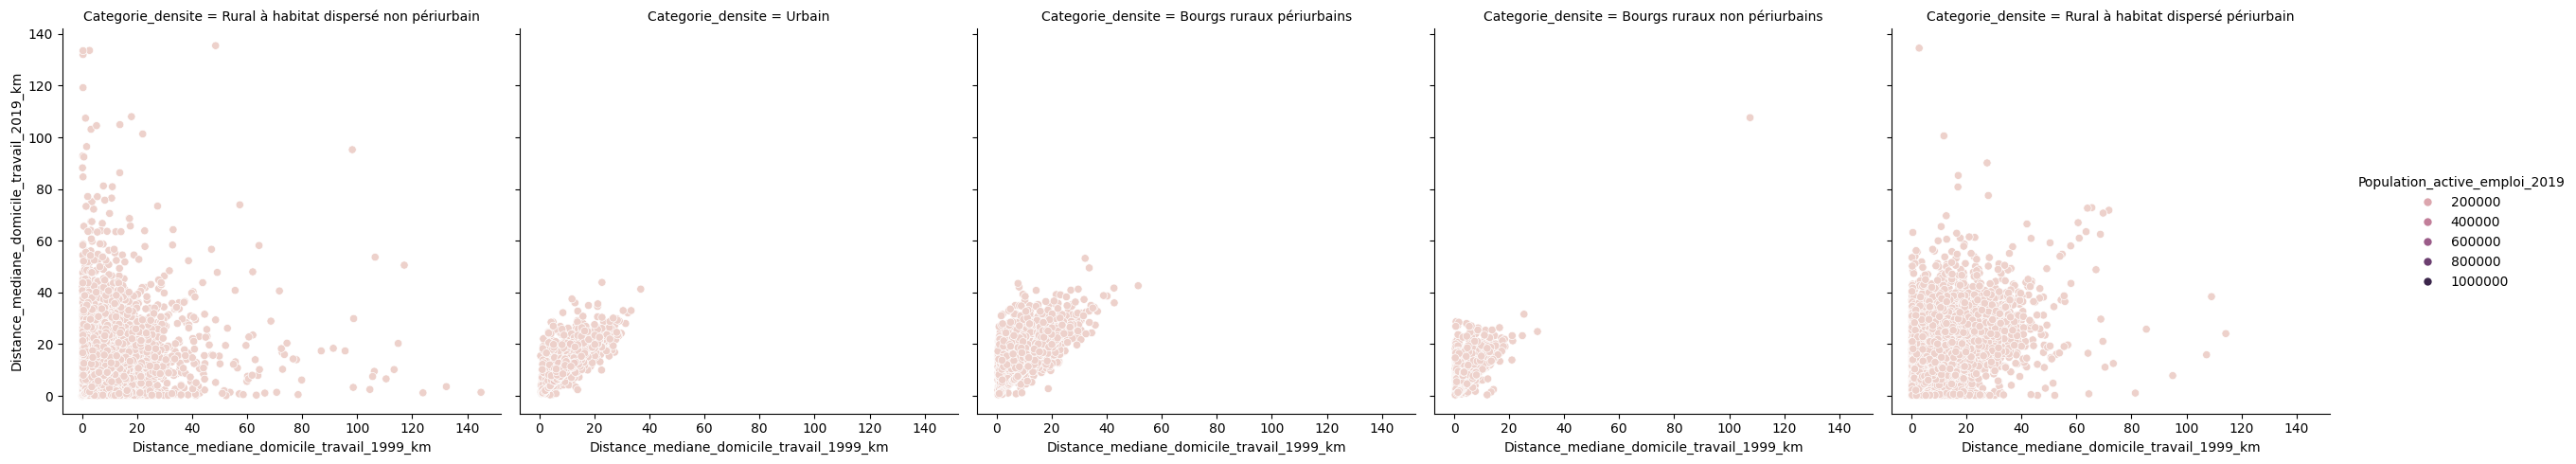

In [3]:
sns.relplot(data=df2, x='Distance_mediane_domicile_travail_1999_km', y='Distance_mediane_domicile_travail_2019_km', 
            col='Categorie_densite', hue='Population_active_emploi_2019',   # time vaut 'Lunch' ou 'Dinner'
           );

Ce graphique montre que globalement les distances parcourues pour aller au travail n'ont pas évolué en moyenne. Seulement en ville (orange) la variance entre ces 2 périodes a été très faible : une grosse v

## Evolution de la population active entre 1999 et 2019

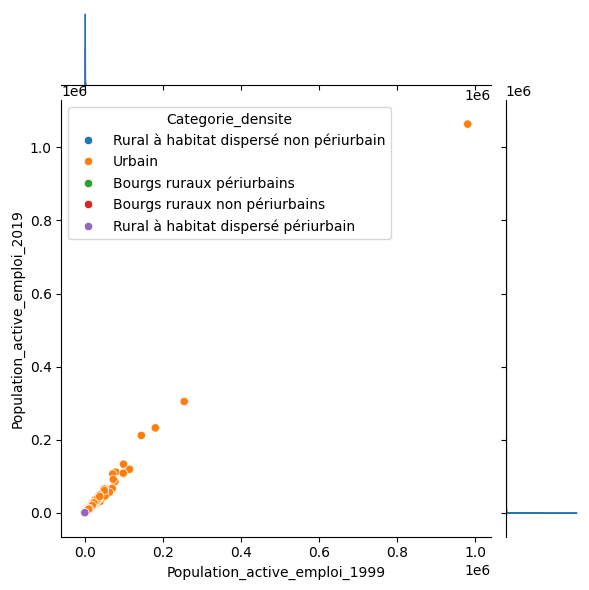

In [4]:
sns.jointplot(
    data=df2,
    x='Population_active_emploi_1999',
    y='Population_active_emploi_2019',
    hue='Categorie_densite'
);

Globalement, la population active n’a pas l’air d’avoir changée depuis 1999. Mais les données sont concentrées sur les faibles populations actives. Donc l’échelle proposée est faussée par les villes à très grande population active.

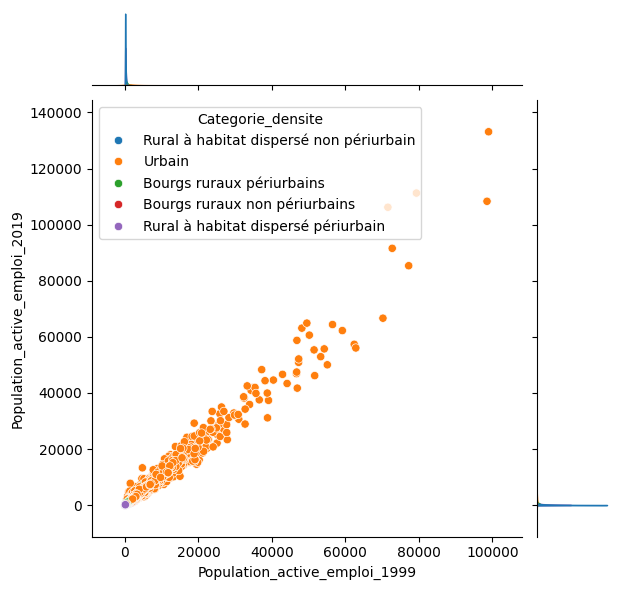

In [5]:
df3 = df2[df2["Population_active_emploi_1999"]<1e5] #On masque les villes avec plus de 100000 actifs
sns.jointplot(
    data=df3,
    x='Population_active_emploi_1999',
    y='Population_active_emploi_2019',
    hue='Categorie_densite'
);

On observe alors qu’en fait la population active a légèrement augmenté. Cependant, on observe toujours uniquement les données du milieu urbain.

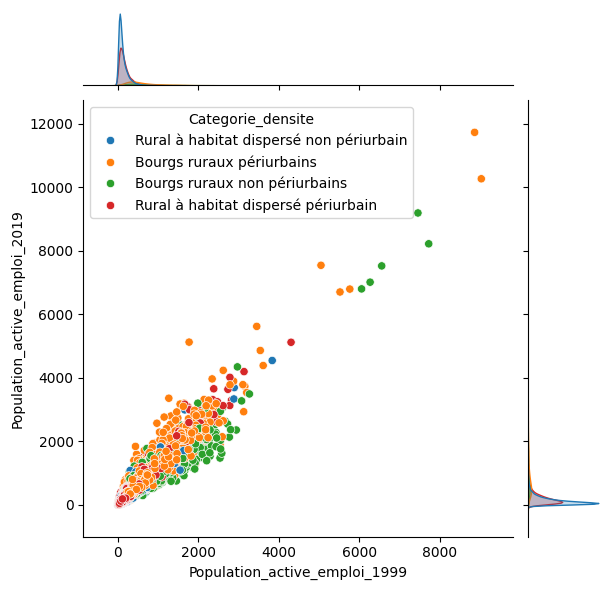

In [6]:
df4 = df3[df3["Categorie_densite"]!="Urbain"] #On masque les villes en milieur urbain
sns.jointplot(
    data=df4,
    x='Population_active_emploi_1999',
    y='Population_active_emploi_2019',
    hue='Categorie_densite'
);

Hors milieu urbain, on observe une hausse de la population active pour quelques communes. Mais la plupart des communes ont une population active de moins de 2000 et on voit mal la répartition dans cette zone.

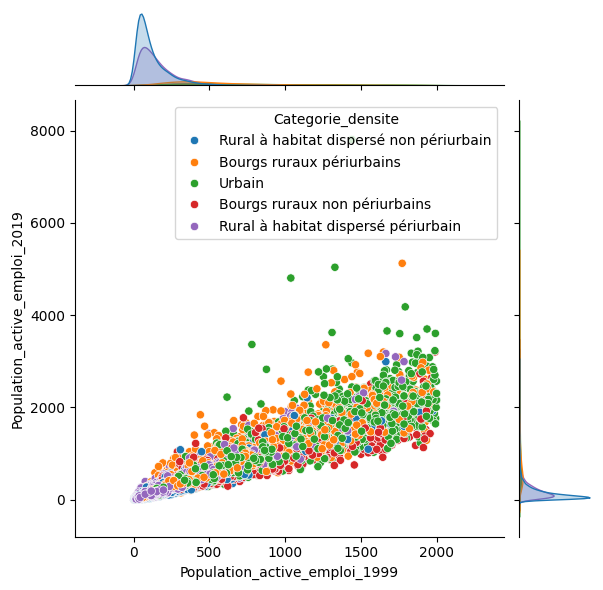

In [7]:
df5 = df2[df2["Population_active_emploi_1999"]<2000] #On s'intéresse uniquement aux communes de population active inférieure à 2000
sns.jointplot(
    data=df5,
    x='Population_active_emploi_1999',
    y='Population_active_emploi_2019',
    hue='Categorie_densite'
);

En zoomant, on voit que la plupart des communes qui avait moins de 2000 actifs en 1999 en ont toujours moins de 2000 en 2019. Mais certaines ont grandit jusqu’à environ 5000 actifs.

## Population active en fonction de la densité

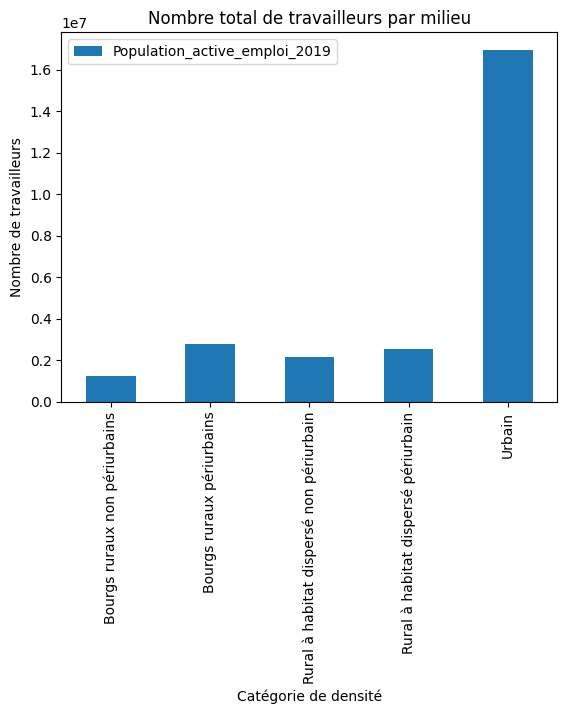

In [8]:
df2population = df2[['Population_active_emploi_2019', 'Categorie_densite']]

by_method = df2population.groupby('Categorie_densite')

counts = by_method.sum()
counts.plot(kind='bar')

plt.title('Nombre total de travailleurs par milieu')
plt.xlabel('Catégorie de densité')
plt.ylabel('Nombre de travailleurs')


# Affichage
plt.show()

On s’intéresse tout d’abord au nombre de travailleurs par catégorie de densité.

Les villes sont bien sûr en tête aevc plus de 10 milions d’actifs, et toutes les zones périurbaines sont de l’ordre du milion.

Cela est cohérent avec la répartition de la population française, dans une grande majorité citadine.

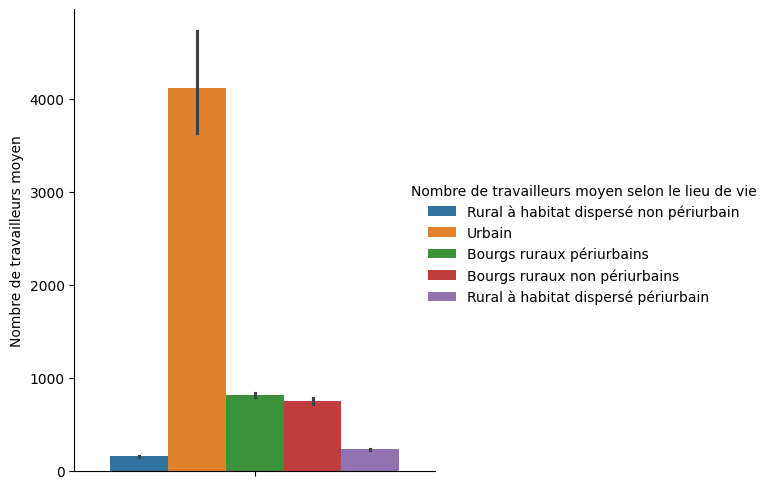

In [9]:
g = sns.catplot(
    data=df2population, kind="bar",
    hue="Categorie_densite", y="Population_active_emploi_2019")
g.set_axis_labels("", "Nombre de travailleurs moyen")
g.legend.set_title("Nombre de travailleurs moyen selon le lieu de vie")

On représente ici les effectifs de population active en fonction da catégirie de densité de l’endroit où les personnes habitent. On remarque sans surprise que ce sont les zones urbaines qui l’emportent avec plus de 4000 travailleurs par commune. De plus, les zones avec la plus faible densité de population sont les zones où il y a le moins de travailleurs.

On remarque également que pour les villes l’incertitude est la plus haute, et plus vers les hautes populations : il y a en effet des villes de taille très variées (dont de très grosses) ce qui augmente cette valeur.

## Tentatives de liens avec un seonc tableau de l'INSEE


On cherche à faire le lien entre le premier tableau contenant des infomations de densité, population et distances au travail, avec celui caractérisant les part de populations en deça du seuil de pauvreté.
On pourrait, à première vue, supposer qu'un lien existe entre ces deux quantités et que des ménages plus faibles existent dans les zones où le travail se situe plus loin du lieu de vie. Cependant dans les cas mesurés, cet effet pourrait être contrbalancé par le fait que trvailler loin nécessite d'avoir assez d'argent pour se déplacer.

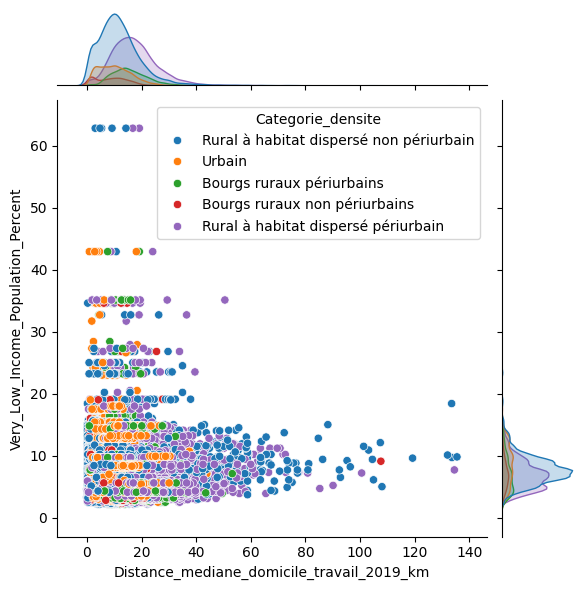

In [10]:
sns.jointplot(
    data=fusion_df,
    x='Distance_mediane_domicile_travail_2019_km',
    y='Very_Low_Income_Population_Percent',
     hue='Categorie_densite');

On essaie donc de tracer un graphique liant les populations à très faibles revenus à la distance domicile travail.

Ce graphique semble solder par un échec nos premières prédictions, qui se traduiraient par une forme de graphe plutôt linéaire ; le graphe ne l'est pas du tout.

Nous avions négligé dans nos considérations l'importance des banlieues, qui sont des zones urbaine, dans les populations qui peuvent avoir de courtes distances à parcourir mais de faibles revenus. 

Ajoutons également que la donnée de proportion de la population à très faible revenus n'est pas le seul indicateur de pauvreté d'un lieu, et que cela ne donne pas la tendance génnérale de la ville considérée. On pourrait avoir beaucoup de "très pauvres" et beaucoup de "très riches" dans une même ville, et nos graphes ne sont pas en mesure de faire des distinctions sur ces considérations.

On essaie tout de même de faire un autre graphe de ce type.

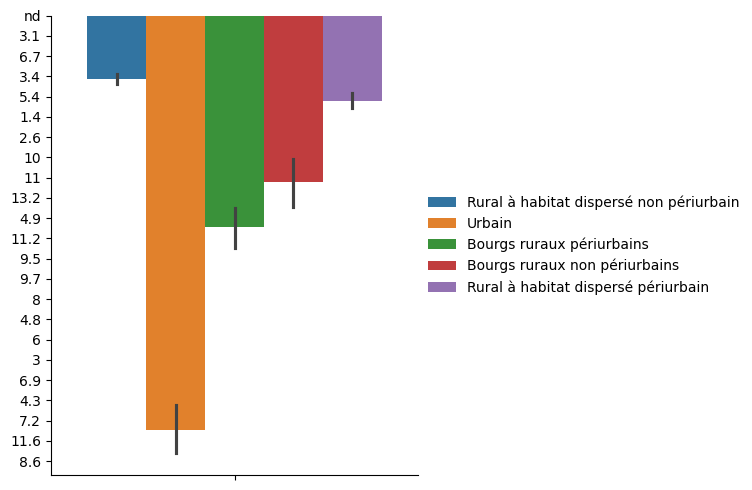

In [12]:
df3 = fusion_df[['Very_Low_Income_Population_Count', 'Categorie_densite']]

g = sns.catplot(
    data=df3, kind="bar",
    hue="Categorie_densite", y="Very_Low_Income_Population_Count")
g.set_axis_labels("", "")
g.legend.set_title("")

Les populations les plus pauvres sont bien dans les villes urbanisées, comme on a pule supposer par la suite !

D'où la non corrélation entre les distances domicile-travail et les plus bas revenus. Que nous n'avons pas pu observer. 